# <center> CFRM521 Machine Learning in Finance
## <center> Lecture 1
### <center> Yoshihiro Shirai

# Machine learning, Python basics, and creating a test set

- These lecture notes are partially based on "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition, by Aurelien Geron (O'Reilly), 2019"

# 0. Overview of the lecture

- We start by some general definitions and terminology
- We then explain how to setup Python and create a Jupyter notebook, which is the only acceptable format for submitting homework sets and the course project.
- After that, the initial steps of a machine learning project is explained, particularly how to create a test set.

# 1. The Machine Learning Landscape
- Read Chapter 1 of the textbook for an overview of machine learning.

## 1.1 What is Machine Learning (ML)?

**ML is the field of study that gives computers the ability to learn without being explicitly programmed**

- **Example**: Consider a particular task, such as deciding if an email is spam.

    - A non-ML approach is to maintain a database of email addresses corresponding to all past spam emails. Do you see a problem with this approach?

    - A "spam filter" is a ML algorithm for flagging spam emails.

    - Consider a set of known spam and non spam emails. Such a set for which the task (i.e. flagging spams) has been completed, is called a "training set"

    - Consider a "performance measure" for the task of flagging spams. For example the percentage of correctly classified emails, which is called "accuracy"

    - The spam filter is a ML algorithm because it learns from experience. That is, its performance, as measured by accuracy, improves after it is "trained" with a training set.

- **Example**: Consider the task of playing a game.

    - You come up with the optimal way of playing the game as a set of rules (possible for simple games such as XO, unrealistic for more complex games such as chess)

    - You code the rules as (a possibly large number of) nested if-statements, which is capable of beating any opponent.

    - Is your program an example of ML?

**ML performs well in the following scenarios:**

- Tasks for which solutions exist but involve a lot of hand-tuning or long lists of rules (ML algorithm may be simple to implement and easier to maintain). Example: spam filtering

- Complex problems for which there is no known solution. ML methods may be able to find good solutions in reasonable amount of time. Example: playing chess

- Dynamic and evolving environments where the problem setting constantly changes. ML methods has the inherent ability to adapt to new data. Example: trading

- Getting insights about the structure of complex systems and large data sets. By "reverse engineering" a trained ML algorithm, we may find out about the data used for training the algorithm. Example: Internet search engines

## 1.2 Types of ML systems
**There are three main categories of ML tasks/algorithms**:
1. "**supervised learning**:" the training data includes the desired outcome (or "label") of the task at hand. Such data set is called "labeled".

    - **Example**: we are given 10K pictures of dogs that have been digitized and turned into vectors representing the colors of each pixel. Each picture is labeled according to the breed, e.g. Bulldog, Huski, French Bulldog, Pug, Corgi, etc. We train our algorithm on these pictures with the hope that it will correctly detect the breed of a new picture.
2. "**unsupervised learning**:" the training data is unlabeled.

    - **Example**: You give 10K digitized pictures of different dogs (unlabeled, without the dog breed tag) to an algorithm in hope that it finds relationships or patterns that it deems most important. The algorithm may group the dogs according to their breed, or perhaps color. It may group the pictures according to something completely different from our "human perspective." Unsupervised learning may be a bit difficult to grasp at first, think about it as the following task: "here are the books in my bookshelf, please sort them."
3. "**reinforcement learning (RL)**:" Staying with our "dog theme," in reinforcement learning an algorithm learns to do a task by being rewarded for successful behavior and/or punished by unsuccessful behavior. There are plenty of examples in RL algorithms mastering different games (chess, GO, Atari games, etc.). There are exciting new applications, such as self-driving cars.

Apart from the three main categories, ML algorithm may also be characterized by other aspects. For example:

1. How is new data used?

    - "**Online learning**" is learning that occurs incrementally from a stream of data. So the model can be updated when new data comes in one instance at a time or in mini-batches without needing to refit from scratch.

    - "**Offline learning**" or "**batch learning**" is when learning occurs using the full training data, not incrementally. So when new data comes in, the model is refit from scratch on the old and new training data.

2. How does the system "generalize" from the training set to new data?

    - "**Instance-based learning**:" The system uses a "measure of similarity" to relate the new data to relevant instances in the training set. Typical ML algorithms that fall in this category are K-nearest neighbors and thos based on kernel methods, used to determine clusters, rankings, and, more in general, in linear/nonlinear manifold learning 

    - "**Model-based learning**:" The system builds a model from the training set, and use it to make predictions. Neural networks are an example of model-based leanring.

There are two main types of data that are often encountered in machine learning:

- **Cross-sectional data**: Data where each instance (row) represents an independent instance. Examples include a data set for house prices where each entry represents the features of a geographic area, or a data set for a medical treatment, where each entry represents the features of a person.

- **Time series data**: Data in the form of a discrete sequence index by time, which can exhibit time dependencies. Examples include the series of monthly unemployment rates, or the daily returns of a stock price over some period of time.

For now, we will consider only cross-sectional data. In later lectures, we will explain how time series data can be treated.

# 2. Python Basics

- Python is a general-purpose interpreted high-level programing language.

- Due to its readability, popularity, and numerous ready-to-use libraries, it has become the de facto programming language for scientific computing (and machine learning in particular).

- If you have not used python before, start with [learnpython.org](https://learnpython.org/) or look at the [Python Tutorial](https://docs.python.org/3/tutorial/)

- Our goal for this lecture is to go over a minimal Python setup which will be sufficient for our course. We will learn more Python programming as we progress through the course.

- Start with installing Python by visiting the [Python website](https://www.python.org/).

- You can also use other managed Python distribution such as [Anaconda](https://www.anaconda.com/). The libraries will be more stable and compatible. However, you will generally be working with older versions of the libraries. This is the easiest way to get started with Python.

- You can use a Python development environment called Jupyter, which is nice and minimalistic and suitable for interactive scientific computing. It is, however, not that efficient for more technical coding tasks such as proper debugging, or for collaboration.

- There are more sophisticated environments, for example, you can use [Visual Studio](https://code.visualstudio.com/).

- Lastly, instead of (or in addition to) setting up your own Python environment, you can use one of the many free online servers. Check out, for example, [Google's Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb).

Each project typically requires installing specific libraries, and it is useful to create an isolated Python environment for each project, so that the libraries do not need to be reinstalled each time. This can be done using the `virtualenv` package. It creates a little "overhead" each time you are setting up a project, but will save you time in the long run.

- In vscode: 
    - open the folder with your project
    - run ctrl+shift+P to open the palette
    - select 'Create environment'
    - choose 'Conda' (highly suggested when you use Git) -> You should now see a '.conda' folder on the left
    - for smaller projects, you can also choose venv (or type `python -m venv venv` in a new terminal) -> you will see a 'venv' folder on the left
        - in this case open new terminal and type: `.\venv\Scripts\activate` -> you should see '(venv)' in terminal before the path
    - all conda environments available can be checked by typing `conda info --envs` in the terminal, and can be activated from the palette
    - now you can install new packages that will be accessible only through this envinroment by typing in the terminal `python -m pip install <package name>`
    - note: 
        - if you use visual code, you need to add python to path environment variable, see [here](https://www.youtube.com/watch?v=4bUOrMj88Pc)
        - To check that python is added to the path, you can run the command `python --version`
        - installation of new packages in a virtual environment may require installation of openssl. I suggest:
            - type: `choco install vscode-insiders.install`
            - type: `choco install openssl --version=1.1.1.4`
    - note for GitHub projects:
        - running a jupyter notebook in a cloned repo requires installing ipykernel (`pip install ipykernel`) in the conda environment
        - once installed (you can check by running `conda list`), close the folder and then reopen it and you should be able to run your notebook
        - now you can save (ctrl+s) commit and sync (third icon on the leftmost menu) any change

- If you use Anaconda
    - open the Anaconda prompt 
    - use Python's own library manager `pip` to install the `virtualenv` package:
    `pip install --upgrade virtualenv`
    - Then, create a Python environment for this course:
        `cd [some path]`
        `virtualenv CFRM521`
        `source [some path]/CFRM421/bin/activate # on Linux or macOS`
        `\[some path]\CFRM421\Scripts\activate  # on Windows`

- Install the following packages: `jupyter` (Python IDE), `numpy` and `scipy` (popular scientific libraries), `pandas` (data structures), `matplotlib` (plotting figures), `sklearn` (ML), `tensorflow` and `keras` (neural networks) by running:
    - type `pip install --upgrade jupyter matplotlib numpy pandas scipy scikit-learn tensorflow keras`
    - if you are using vscode, you should now see in the Lib folder of `venv` or `.conda` these packages, or you can type `conda list` in the terminal 

- Create a new ipynb file in vscode, or open `Jupyter` by typing `jupyter notebook` and create a new notebook

- Run the following commands

In [21]:
print("Hello World!")

Hello World!


In [1]:
1+3

4

**Activate/Check Conda environment**

- To activate your conda environment when typing commands in the shell, type (in the shell) 
    `conda activate "CFRM521"`
- To activate your conda environment in your notebook, select the Python interpreter in the right corner in VSCode, or under kernel in Jupyter
- Note: sometimes after installing libraries in a new environment you may get an error `Import <lib> could not be resolved` in VSCode. Try opening the palette, and then select `Developer: Reload Window`


In [2]:
## Check what is your conda environment

import sys
print(sys.executable)

import os
print(os.environ['CONDA_DEFAULT_ENV'])

c:\Users\yoshi\anaconda3\envs\CFRM521\python.exe
CFRM521


- in Anaconda: to close the notebook, run ctrl+C in the prompt.

**Basics on GitHub** 

- You can sign up for free on GitHub

- you'll need to install a few softwares on vscode - follow the instructions on https://code.visualstudio.com/docs/sourcecontrol/intro-to-git

- create a new repo and upload any files you might already have

- open vscode and sign up from the bash (create new terminal, select + icon in upper right file, and then select bash) by running 
    - `git config user.email <youremail>`
    - `user config user.name <yourname>`

- You should now be able to clone the repo on a local folder

- GitHub allows mutliple people to collaborate on the same project, by granting access to the repo

- Each collaborator will start by cloning the main branch of the repo on their local machine

- When you or a collaborator want to test something, type `git checkout -b <branchname>` to create a new branch from the main branch

- This new branch will be a local one. To push the new branch into the repo, type `git push -u <remote> <branchname>`

- Everyone who has access to the repo can see the remote branch you have just created

- Modify the new local branch as you like, save it and then commit your changes to the remote one

- Finally, the remmote branch can be merged with main and the code incorporated in the project by typing `git merge branchname` from main, where branchname is the name of the branch that you want to merge with main

- All remote branches can be accessed by any collaborator, by typing `git checkout <remote>/<branchname>`

- The list of existing (local and remote) branches can be accessed by typing `git branch -a`

- To check your current branch you can also type `git status`

- To delete a local branch type `git branch -d <branchname>`. Note this cannot be done if you are currently on the branch you want to delete

- To delete a remote branch, type `git push <remote> -d <branchname>`

- Here is a good summary of basic Git commands: <https://www.nobledesktop.com/learn/git/git-branches>


# 3. Example of creating a test set
- Let us walk though setting up a simple ML project

- Our goal here is to get familiar with a few Python packages

- Read Chapter 2 of the book for the full description of the project

- The task is to build a model of housing prices in California using California census data

- To begin with, we should frame the problem, choose a performance measure, obtain the data. The main steps for a machine learning project are:

    1. Create a test set.

    2. Clean the data, impute missing values, transform the variables.

    3. Train some models to try out.

    4. Fine-tune the models and select the best model.

    5. Evaluate the performance of the final model on the test set.

- Here, we focus on Step 1 and 2. In the next lectures, we will consider Steps 3 to 5. In Homework 1, you will go through an end-to-end machine learning project using all these steps.

- There are other steps that may be useful. For example:

    - On the training set, examine and visualize the data, perform some basic descriptive statistics to gain some insight.

    - Use domain knowledge to find certain combinations of the variables (variables are also called attributes or features) that may be more useful for prediction.

    - In the final model, use feature importance measures to examine which features are the most important.

## 3.1. Getting data
- Let us start by obtaining the data, which can be downloaded from https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz

- The data is a compressed CSV file. We can manually download and uncompress the file. A better method is to write a function for fetching the file (why is this method better?)

- We start by loading relevant libraries that give us the functions we need to download and uncompress the file

In [24]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

- Next, we define the function for downloading and uncompressing the data

In [25]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

- Now, call the function and store its output in the variable housing which is of type `DataFrame`. Note that `Pandas` is a package for handling data frames.

In [26]:
housing = load_housing_data()
type(housing)

pandas.core.frame.DataFrame

- We can look at the top rows of housing by using the head() method

- Each instance represents a **block group** in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes data, typically with a population of 600 to 3,000 people

In [27]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- The `info()` method gives a summary of the data

In [28]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- `ocean_proximity` is a categorical attribute. We can find out more information about its categories by using the `value_counts()` method

In [29]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

- We can get summary statistics by using the `describe()` method

In [30]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- Plotting histograms are a good way to get a quick visualization of the data. This can be achieved by using the `hist()` method

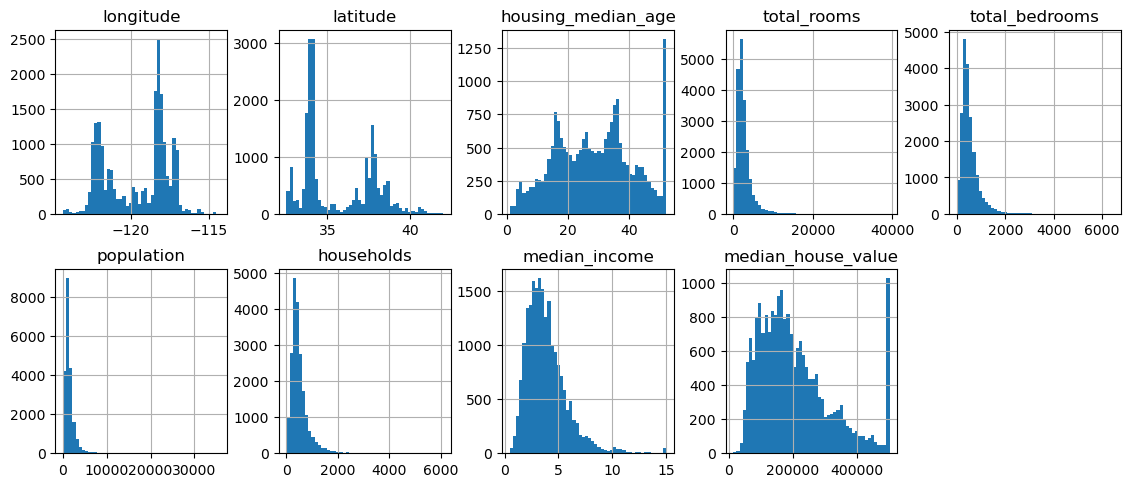

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
scale = 2.75
housing.hist(bins=50, figsize=(5*scale,2*scale), layout=(2,5))
plt.show()

## 3.2. Creating a test set
- Before looking at the data any further, we must create a test set and put it aside for later use in approximating the **out-of-sample** or **generalization error**.

- The underlying idea is as follows. Suppose that you have 10K labeled pictures of dogs. If you train a model using all 10K pictures, then how would you get an estimate of the error you would make in detecting a new picture?

- You cannot use any measure of error based on the pictures used for training the algorithm. The algorithm has already "seen" those pictures. The analogy is a two-year old playing with her first jigsaw puzzle. Once she master the puzzle, does it mean that she has learned how to solve all types of jigsaw puzzles? Or maybe she only memorized her puzzle?

- To be able to estimate the magnitude of the error a trained algorithm makes on a new observation, we split our data in two parts:
    - A **training set** that is used for training the model.
    - A **test set** that is used for estimating the out-of-sample error. The algorithm must NOT use the test set in ANY way during training.

- Often a training set is further split off to make a **validation set**. This can be created in the same way as the test set, and is used for tuning hyperparameters and choosing which competing model has the best out-of-sample performance. We will discuss this later.

- It is crucial to create the test set before you start thinking about the model to avoid "*data-snooping bias*".

- This is a scenario where the model is overfitted to the data (including the test set). Although such model would seem to have a good performance on the existing data, it will not generally have a good performance on new data.

- As a rule of thumb, pick 20% of your data as a test set.

- We can use the `train_test_split()` function in Scikit-Learn to create a test set

In [32]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN


- By randomly choosing the test set, we may very well end up with highly biased samples

- A systematic way to avoid this issue is to use "stratified sampling."
    
- In this approach, the sample is divided into homogeneous subsamples called "strata". Then, an appropriate number of data points are taken from each stratum, so that the representation of each strata in the test set is maintained with respect to the original dataset

- Assume that median income is a very important attribute in predicting median housing prices

- We want to ensure that the test set is representative of various categories of income in the whole data set

<Axes: >

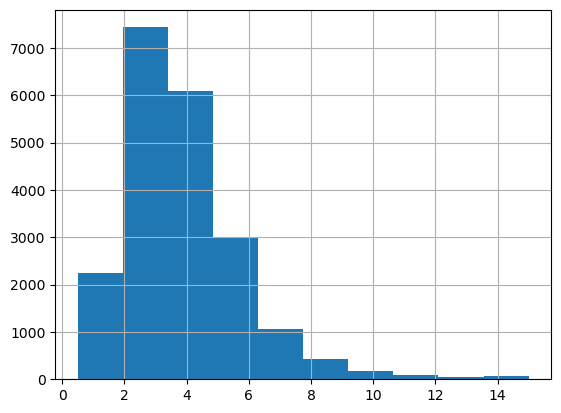

In [33]:
housing["median_income"].hist()

- Next, we add a new attribute to the housing dataset, called "income_cat" and whose values range from 1 to 5

- Each value of the new attribute represents a level of income

In [34]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

- Let us see how the income categories are populated

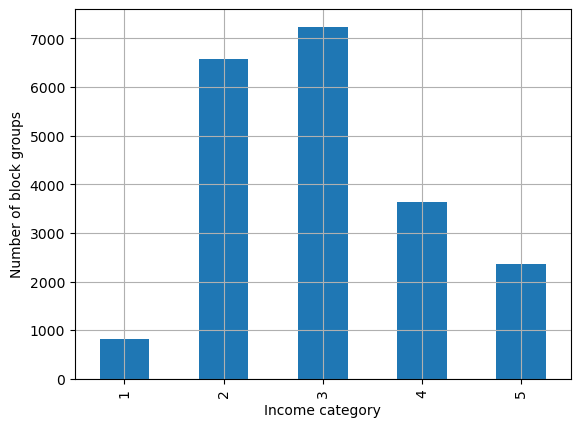

In [39]:
housing["income_cat"].value_counts().sort_index().plot.bar(grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of block groups")
plt.show()

- We can now use Scikit-Learn's `StratifiedShuffleSplit` class to create a stratified sampling based on the income category

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) #Instane of StratifiedShuffleSplit with 1 split and 20% test size
#split method of StratifiedShuffleSplit takes the dataset and the target variable to create stratified splits and returns their index.
for train_index, test_index in split.split(housing, housing["income_cat"]): 
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index] 

- Let us check the distribution of income categories in the resulting test set

In [41]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

- Now, let us compare with the distribution of the income categories in the whole dataset

In [42]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

- Let us compare the sampling bias between random and stratified sampling

In [43]:
# We need to re-create the random test sample, since we added the income categories
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)


compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * \
    compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * \
    compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.042393,6.447689,0.364964
2,0.318847,0.318798,0.307413,-3.586081,-0.015195
3,0.350581,0.350533,0.345203,-1.533997,-0.013820
4,0.176308,0.176357,0.184109,4.424292,0.027480
5,0.114438,0.114341,0.120882,5.630821,-0.084674


Finally, we should remove the `income_cat` attribute from the data

In [44]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

- We save a copy of the training set for exploring and building our model

In [45]:
housing = strat_train_set.copy()